### Modelo Logistic Regresion

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [3]:
goals1 = pd.read_csv('./data/goals1.csv', index_col=0)
goals2 = pd.read_csv('./data/goals2.csv', index_col=0)
goals3 = pd.read_csv('./data/goals3.csv', index_col=0)
goals4 = pd.read_csv('./data/goals4.csv', index_col=0)

In [4]:
goals1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5636 entries, 29 to 991297
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  5636 non-null   object
 1   traits_main_goal         5636 non-null   object
 2   traits_nutritional_goal  5636 non-null   object
dtypes: object(3)
memory usage: 176.1+ KB


In [5]:
len(goals1.user_id.unique())

5636

In [6]:
goals2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7304 entries, 70 to 451019
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  7304 non-null   object
 1   traits_main_goal         7304 non-null   object
 2   traits_nutritional_goal  7304 non-null   object
dtypes: object(3)
memory usage: 228.2+ KB


In [7]:
len(goals2.user_id.unique())

7304

In [8]:
goals3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9834 entries, 2 to 1615871
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  9834 non-null   object
 1   traits_main_goal         9834 non-null   object
 2   traits_nutritional_goal  9834 non-null   object
dtypes: object(3)
memory usage: 307.3+ KB


In [9]:
len(goals3.user_id.unique())

9834

In [10]:
goals4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9140 entries, 45 to 2628487
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  9140 non-null   object
 1   traits_main_goal         9140 non-null   object
 2   traits_nutritional_goal  9140 non-null   object
dtypes: object(3)
memory usage: 285.6+ KB


In [11]:
len(goals4.user_id.unique())

9140

In [12]:
lista_goals = [goals1, goals2, goals3, goals4]
goals = pd.concat(lista_goals)

In [13]:
len(goals.user_id.unique())

9834

In [14]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31914 entries, 29 to 2628487
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  31914 non-null  object
 1   traits_main_goal         31914 non-null  object
 2   traits_nutritional_goal  31914 non-null  object
dtypes: object(3)
memory usage: 997.3+ KB


### Cada usuario tiene mas de un main_goal, voy a crear una columna por main_goal con dummies

In [15]:
goals.groupby('traits_main_goal')['user_id'].count().reset_index()

,traits_main_goal,user_id
0,feelBetter,15013
1,loseWeight,6443
2,reducePain,3799
3,stayActive,6659


In [16]:
goals.groupby('traits_main_goal')['user_id'].count().reset_index()

,traits_main_goal,user_id
0,feelBetter,15013
1,loseWeight,6443
2,reducePain,3799
3,stayActive,6659


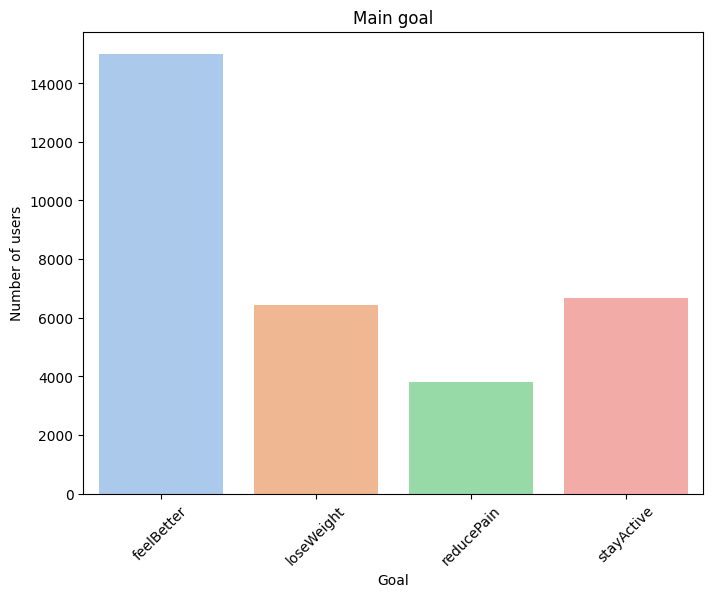

In [17]:
data = {'traits_main_goal': ['feelBetter', 'loseWeight', 'reducePain', 'stayActive'],
        'user_id': [15013,6443,3799,6659]}

df = pd.DataFrame(data)

# Configuración de colores suaves
colores_suaves = sns.color_palette("pastel")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='traits_main_goal', y='user_id', data=df, palette=colores_suaves)

# Configuraciones adicionales
plt.title('Main goal')
plt.xlabel('Goal')
plt.ylabel('Number of users')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [18]:
encoded_goals = pd.get_dummies(goals[['traits_main_goal', 'traits_nutritional_goal']], prefix=['main_goal', 'nutritional_goal'])

In [19]:
goals = pd.concat([goals, encoded_goals], axis=1)

In [20]:
goals.head()

,user_id,traits_main_goal,traits_nutritional_goal,main_goal_feelBetter,main_goal_loseWeight,main_goal_reducePain,main_goal_stayActive,nutritional_goal_improveNutrition,nutritional_goal_increaseMuscle,nutritional_goal_loseWeight,nutritional_goal_none
29,QERm7ubmg9cvxJSzSczHxPLv4BX2,feelBetter,improveNutrition,True,False,False,False,True,False,False,False
31,xjyafoTkwBRalUMz3QJh3ze2mKo1,feelBetter,none,True,False,False,False,False,False,False,True
32,kWszsTo8zoPuLrhHPDpHvQJKaFe2,feelBetter,loseWeight,True,False,False,False,False,False,True,False
33,5b6YWquNE3g3jEqrqYuwUmaNS233,feelBetter,loseWeight,True,False,False,False,False,False,True,False
34,Vw6V7XybuLX9yDwETEpV7MC62612,stayActive,improveNutrition,False,False,False,True,True,False,False,False


In [21]:
goals = goals.drop(['traits_main_goal', 'traits_nutritional_goal'], axis=1)

In [22]:
df_grouped = goals.groupby('user_id').sum().reset_index()

In [23]:
df_grouped.head()

,user_id,main_goal_feelBetter,main_goal_loseWeight,main_goal_reducePain,main_goal_stayActive,nutritional_goal_improveNutrition,nutritional_goal_increaseMuscle,nutritional_goal_loseWeight,nutritional_goal_none
0,01PH4mMfTReLSovBbVPClTbKQZE3,0,2,0,0,0,0,2,0
1,0200jXVkonhhOjxnB6vEPwCAoyV2,4,0,0,0,4,0,0,0
2,02AFjTAuNGOrWbLXGDp3xrBkA1v1,0,4,0,0,0,0,4,0
3,02EwSnloHTZMAStpcmHiulKy8np2,0,0,0,4,4,0,0,0
4,03GzGEPkN0hyf8qiC3ntUquwIBE3,0,0,0,2,0,0,2,0


In [24]:
df_grouped.main_goal_reducePain.value_counts()

main_goal_reducePain
0    8666
4     670
3     208
2     205
1      85
Name: count, dtype: int64

In [25]:
len(df_grouped.user_id.unique())

9834

In [26]:
datos_goals = goals.merge(df_grouped,on='user_id',how='left')

In [27]:
datos_goals = datos_goals.fillna(0)

In [2]:
datos_goals = pd.read_csv('./data/datos_goals.csv',index_col=0)

In [3]:
datos = pd.read_csv('./data/datos_modelo.csv',index_col=0)

In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20023 entries, 0 to 2774399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 20023 non-null  object 
 1   total_events            20023 non-null  int64  
 2   Baja_usuario            20023 non-null  int64  
 3   events_last_month       20023 non-null  float64
 4   total_months            20023 non-null  int64  
 5   rate_events             20023 non-null  float64
 6   age                     20023 non-null  float64
 7   gender                  20023 non-null  int64  
 8   height                  20023 non-null  float64
 9   seniors_exercise_level  20023 non-null  float64
 10  traits_language_code    20023 non-null  int64  
 11  os_name                 20023 non-null  int64  
 12  device_type             20023 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


In [31]:
datos.os_name.value_counts()

os_name
1    11718
2     7518
3      787
Name: count, dtype: int64

In [32]:
df_plot = datos[['Baja_usuario','os_name']]


In [33]:
df_plot['os_name'] = df_plot['os_name'].map({1: 'Android', 2: 'iOS', 3: 'iPadOS'})

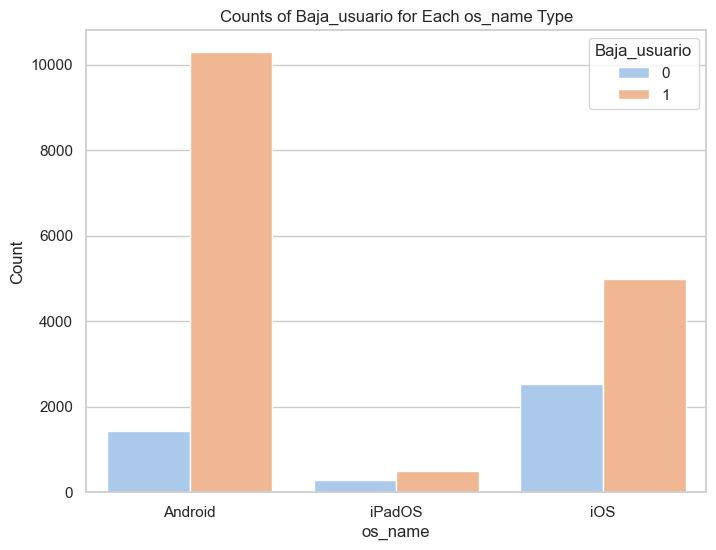

In [34]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='os_name', hue='Baja_usuario', data=df_plot, palette='pastel')

# Additional configurations
plt.title('Counts of Baja_usuario for Each os_name Type')
#plt.xlabel('os_name')
plt.ylabel('Count')

# Show the plot
plt.show()

In [35]:
data = datos.seniors_exercise_level.value_counts().reset_index()

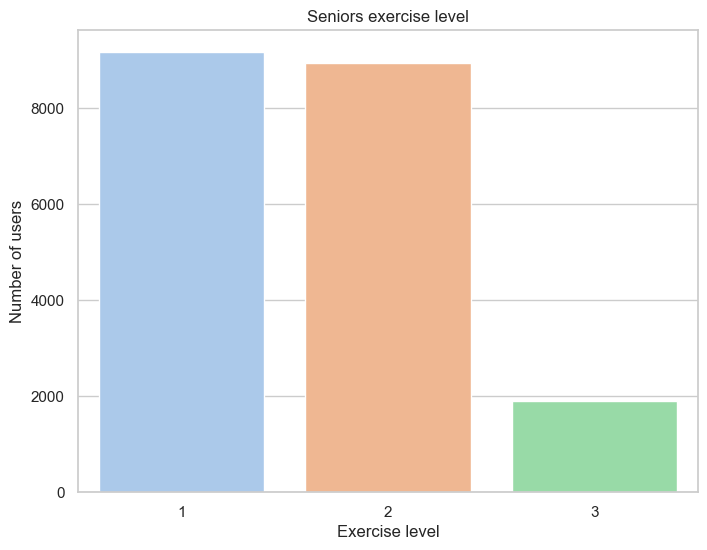

In [36]:
data = {'seniors_exercise_level': ['1', '2', '3'],
        'count': [9164, 8949, 1910]}

df = pd.DataFrame(data)

# Configuración de colores suaves
colores_suaves = sns.color_palette("pastel")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='seniors_exercise_level', y='count', data=df, palette=colores_suaves)

# Configuraciones adicionales
plt.title('Seniors exercise level')
plt.xlabel('Exercise level')
plt.ylabel('Number of users')

# Rotar las etiquetas del eje x para mayor legibilidad
#plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [37]:
datos_goals.Baja_usuario.value_counts()

Baja_usuario
1    15787
0     4236
Name: count, dtype: int64

In [38]:
datos.Baja_usuario.value_counts()

Baja_usuario
1    15787
0     4236
Name: count, dtype: int64

<BarContainer object of 2 artists>

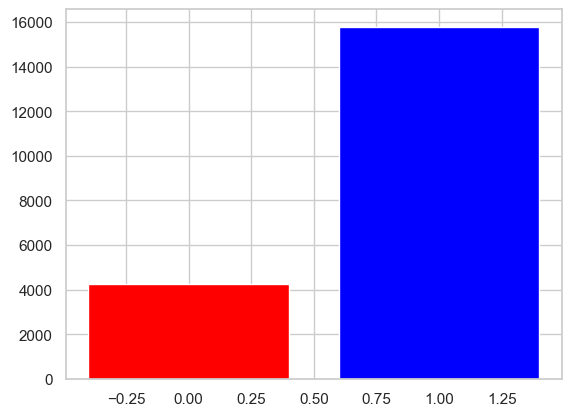

In [39]:
count_values = datos['Baja_usuario'].value_counts()

# Grafica la distribución de valores
plt.bar(count_values.index, count_values.values, color=['blue', 'red'])

In [40]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20023 entries, 0 to 2774399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 20023 non-null  object 
 1   total_events            20023 non-null  int64  
 2   Baja_usuario            20023 non-null  int64  
 3   events_last_month       20023 non-null  float64
 4   total_months            20023 non-null  int64  
 5   rate_events             20023 non-null  float64
 6   age                     20023 non-null  float64
 7   gender                  20023 non-null  int64  
 8   height                  20023 non-null  float64
 9   seniors_exercise_level  20023 non-null  float64
 10  traits_language_code    20023 non-null  int64  
 11  os_name                 20023 non-null  int64  
 12  device_type             20023 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


In [41]:
datos_goals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20023 entries, 0 to 20022
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            20023 non-null  object 
 1   total_events                       20023 non-null  int64  
 2   Baja_usuario                       20023 non-null  int64  
 3   events_last_month                  20023 non-null  float64
 4   total_months                       20023 non-null  int64  
 5   rate_events                        20023 non-null  float64
 6   age                                20023 non-null  float64
 7   gender                             20023 non-null  int64  
 8   height                             20023 non-null  float64
 9   seniors_exercise_level             20023 non-null  float64
 10  traits_language_code               20023 non-null  int64  
 11  os_name                            20023 non-null  int64  


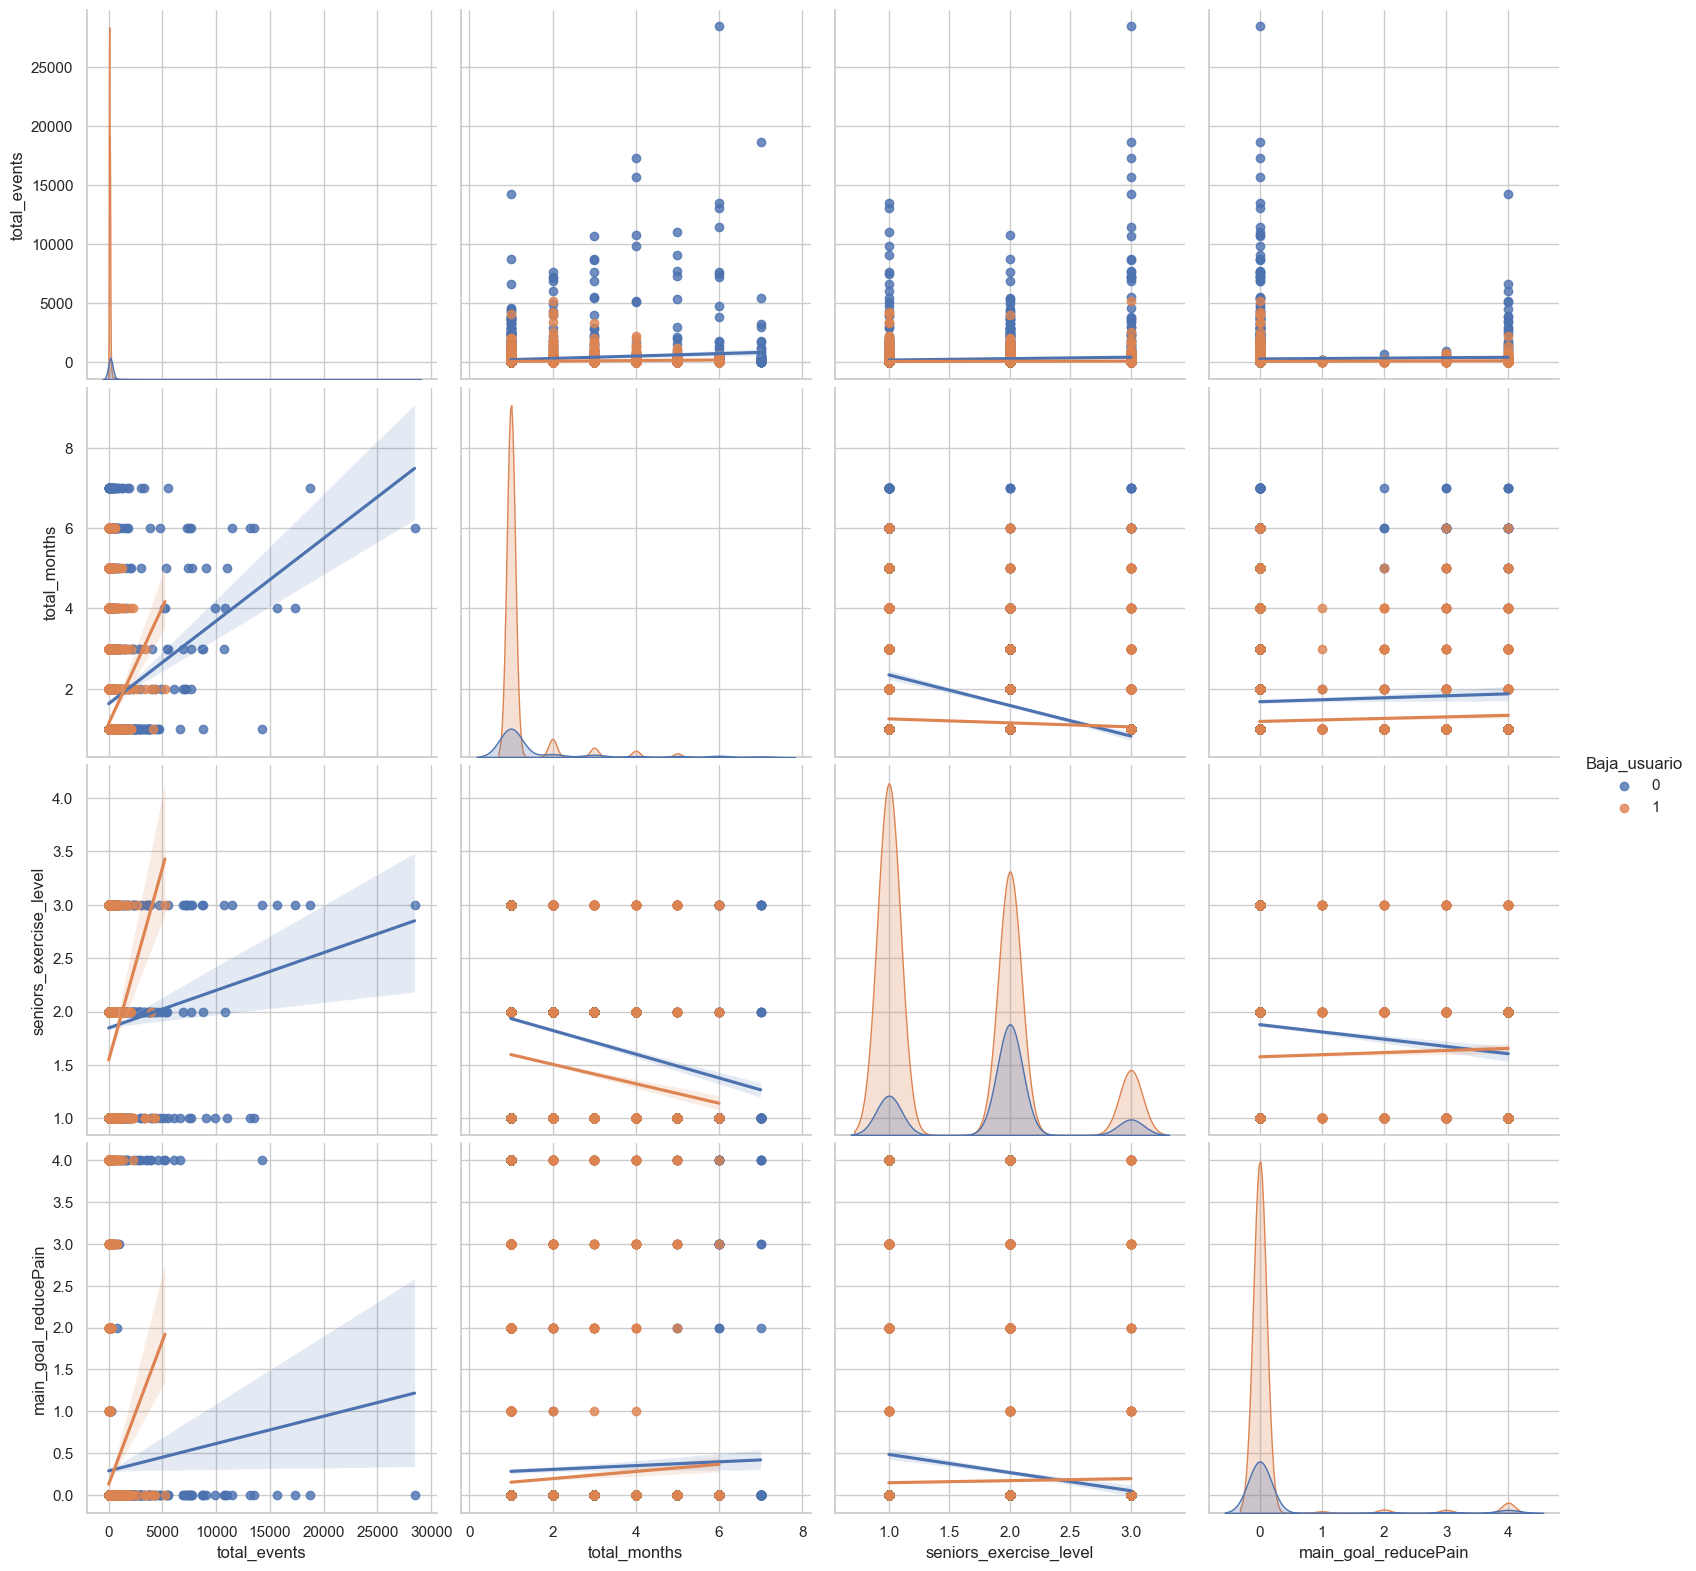

In [42]:
sns.pairplot(datos_goals,
            hue='Baja_usuario',
            height=4,
            vars=["total_events", "total_months","seniors_exercise_level",'main_goal_reducePain'],
            kind='reg'); 

<Axes: >

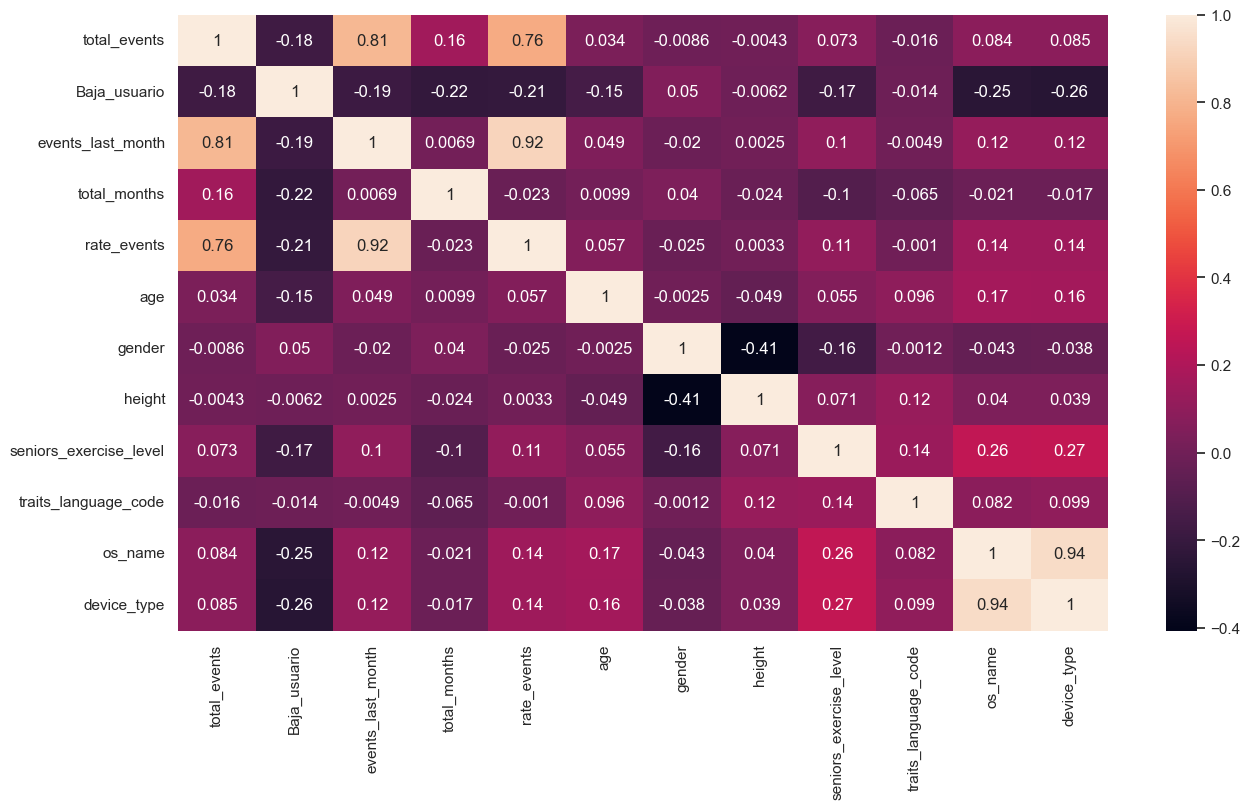

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(datos.corr(numeric_only=True),annot=True)

<Axes: >

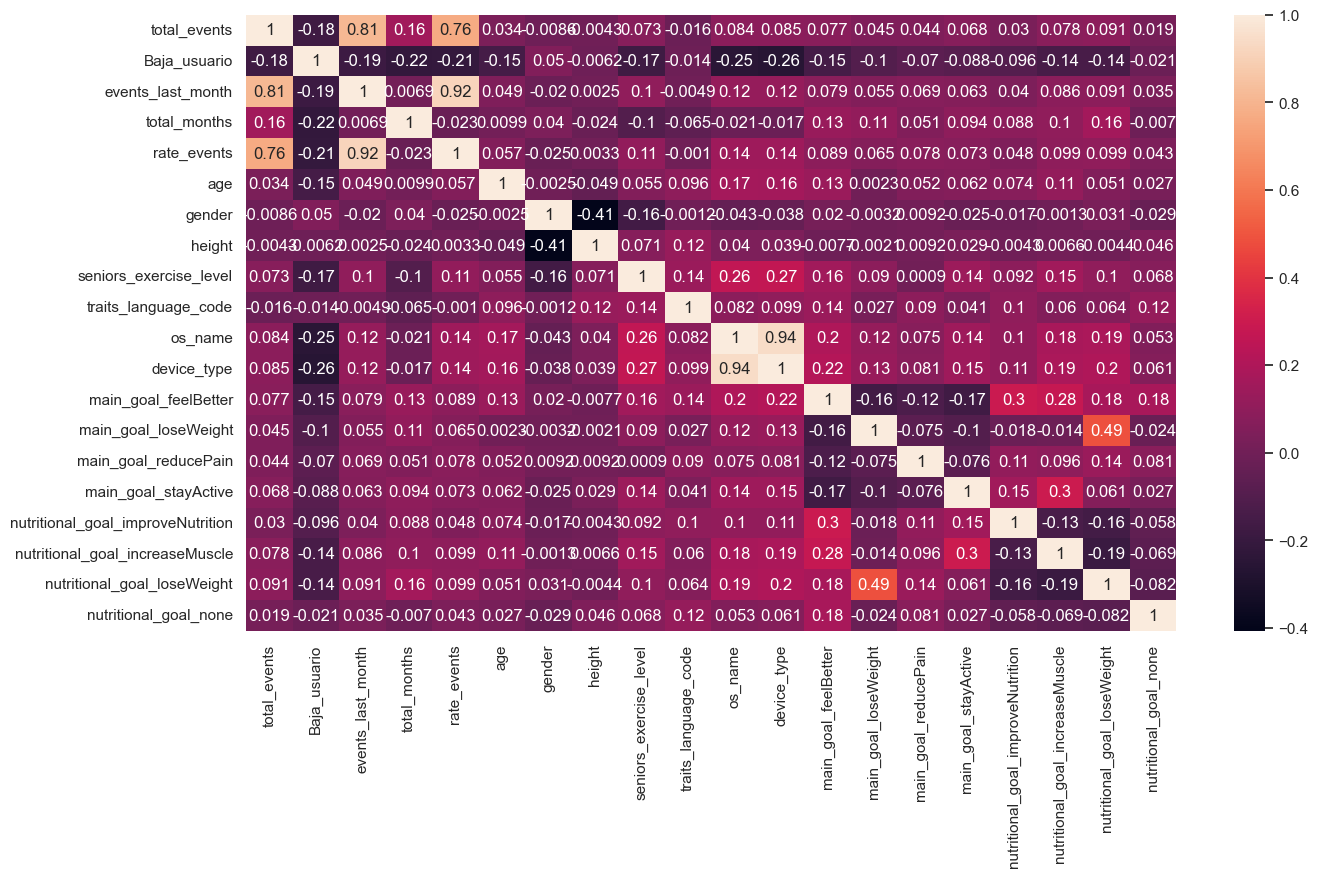

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(datos_goals.corr(numeric_only=True),annot=True)

In [4]:
datos_goals.isna().sum()

user_id                              0
total_events                         0
Baja_usuario                         0
events_last_month                    0
total_months                         0
rate_events                          0
age                                  0
gender                               0
height                               0
seniors_exercise_level               0
traits_language_code                 0
os_name                              0
device_type                          0
main_goal_feelBetter                 0
main_goal_loseWeight                 0
main_goal_reducePain                 0
main_goal_stayActive                 0
nutritional_goal_improveNutrition    0
nutritional_goal_increaseMuscle      0
nutritional_goal_loseWeight          0
nutritional_goal_none                0
dtype: int64

In [46]:
datos.isna().sum()

user_id                   0
total_events              0
Baja_usuario              0
events_last_month         0
total_months              0
rate_events               0
age                       0
gender                    0
height                    0
seniors_exercise_level    0
traits_language_code      0
os_name                   0
device_type               0
dtype: int64

### Guardo los datos ya limpios para empezar a buscar modelo de prediccion
### Dos dataframes uno con los goals que tenemos y otro sin ellos a ver con cual va mejor el modelo

In [47]:
datos_goals.to_csv('./data/datos_goals.csv')

In [48]:
datos.to_csv('./data/datos_modelo.csv')

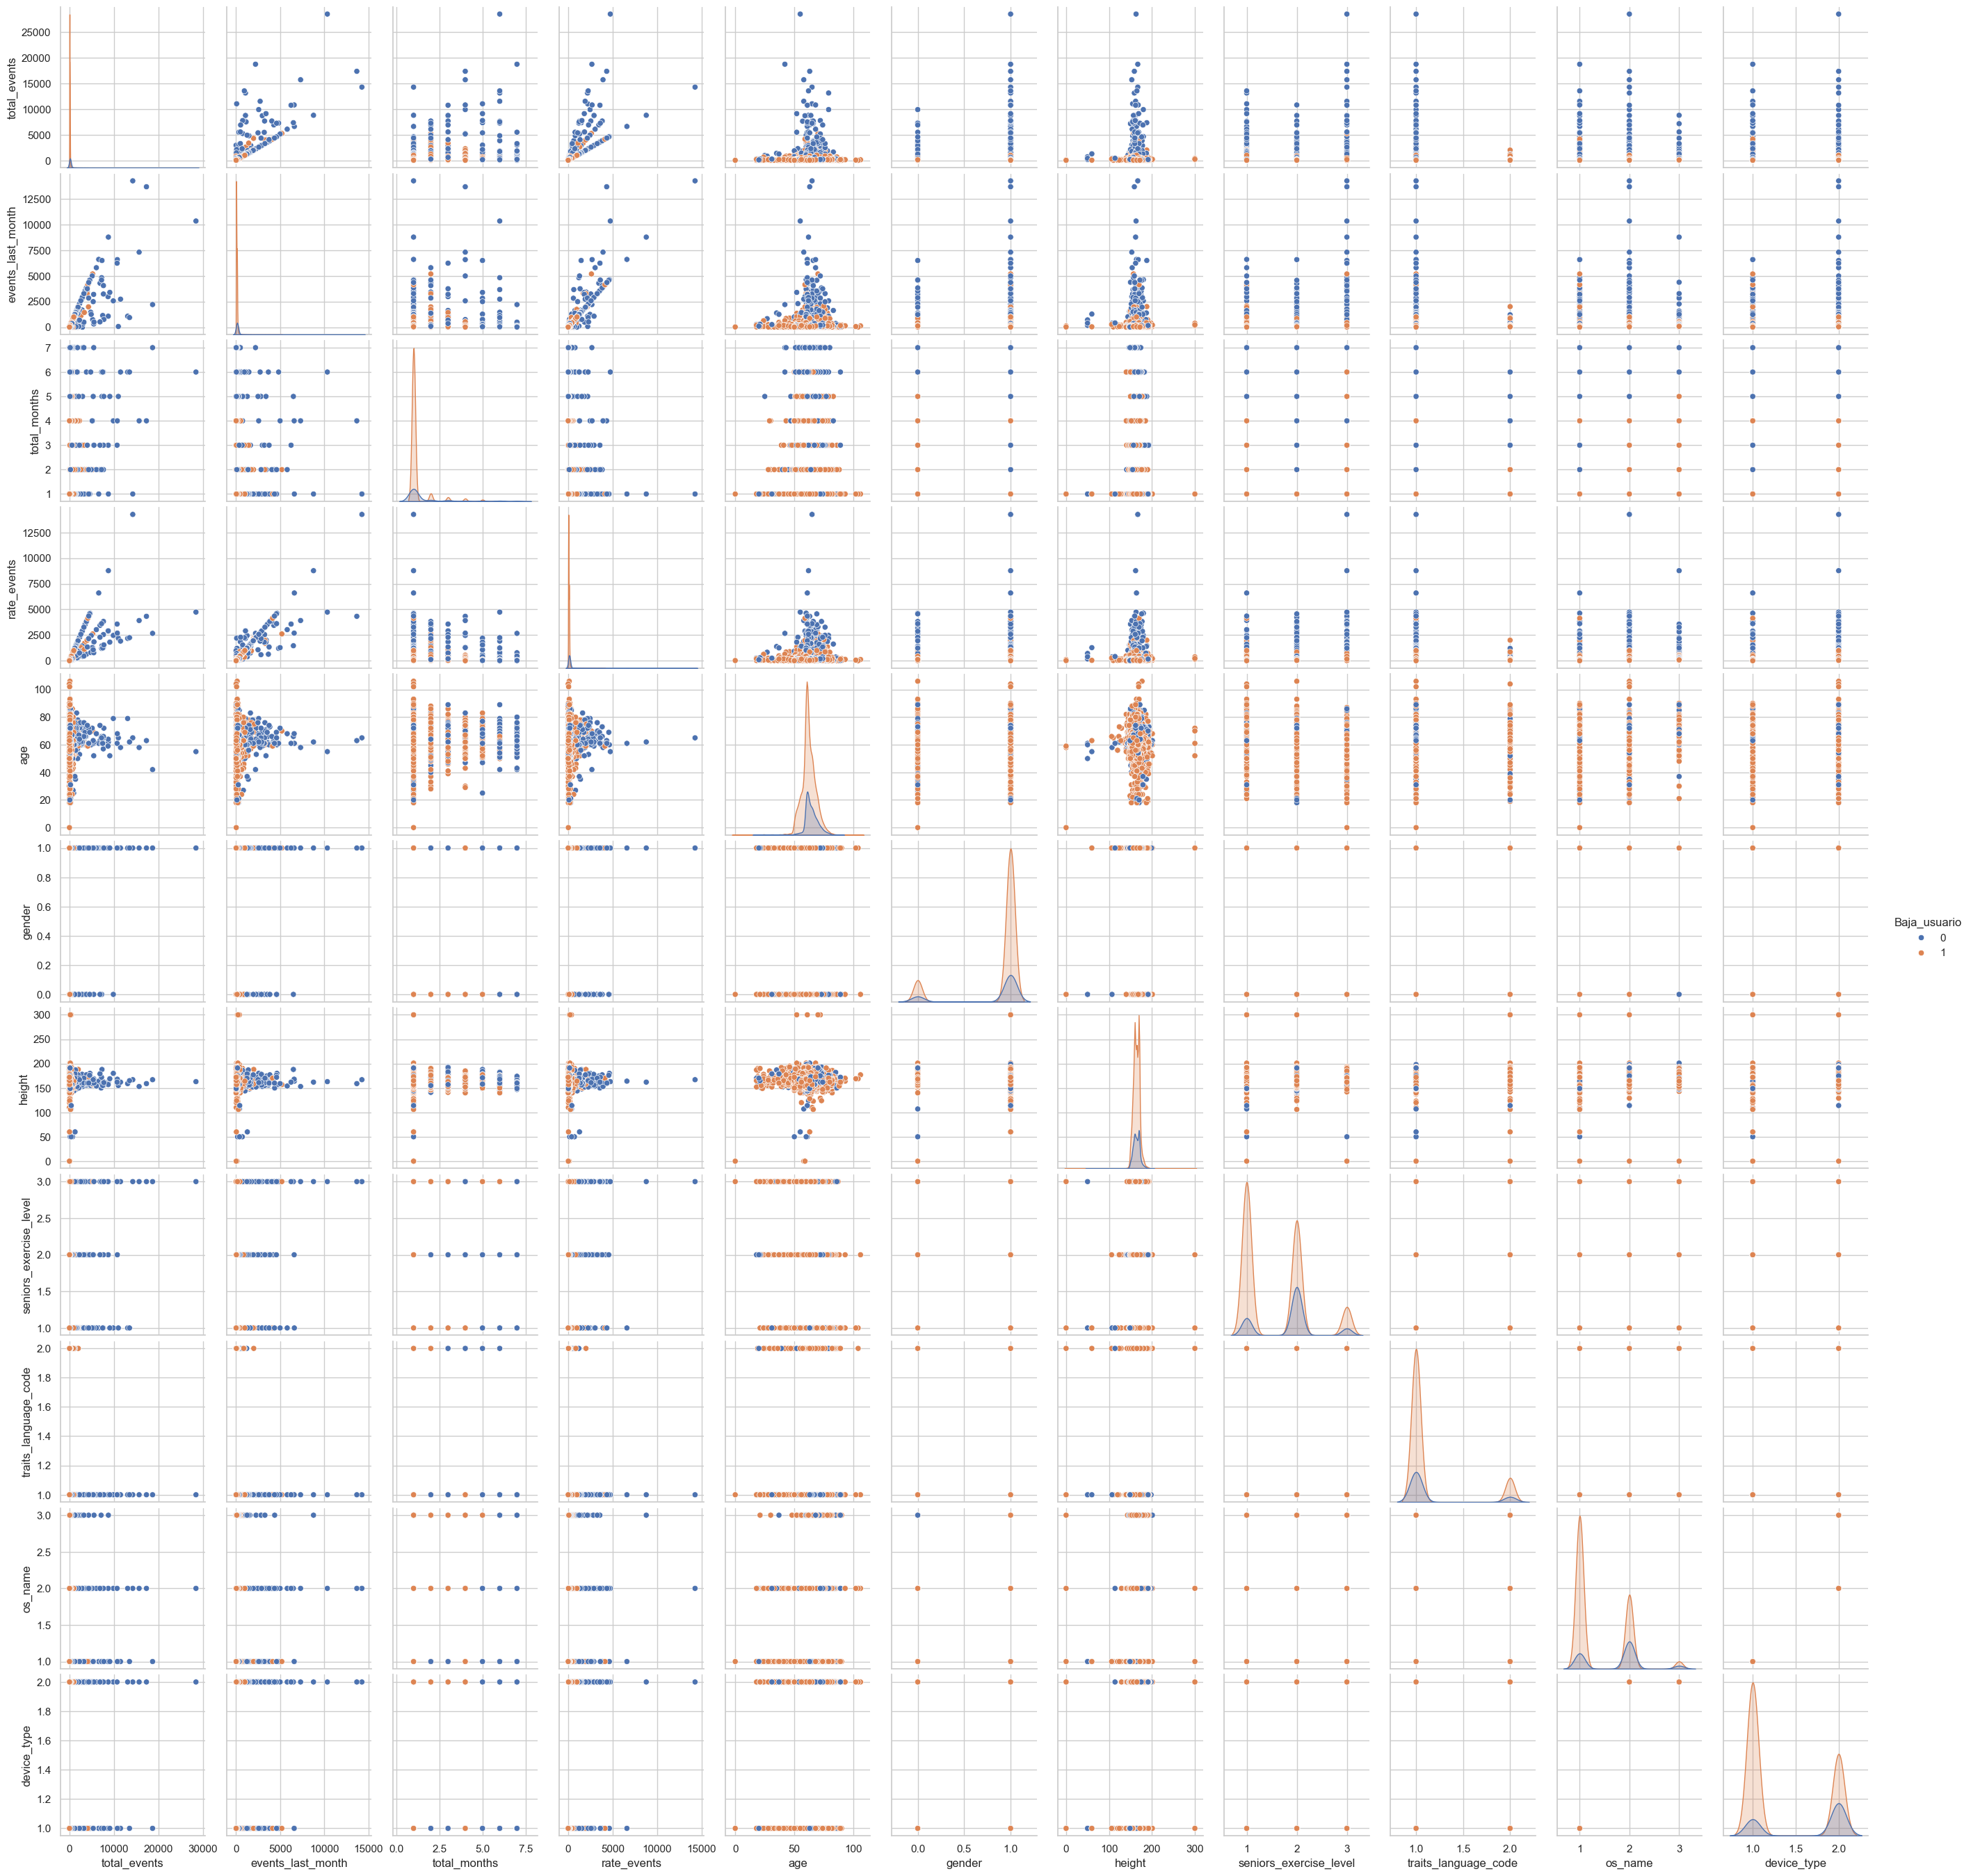

In [49]:
sns.pairplot(datos, hue='Baja_usuario')

<Axes: >

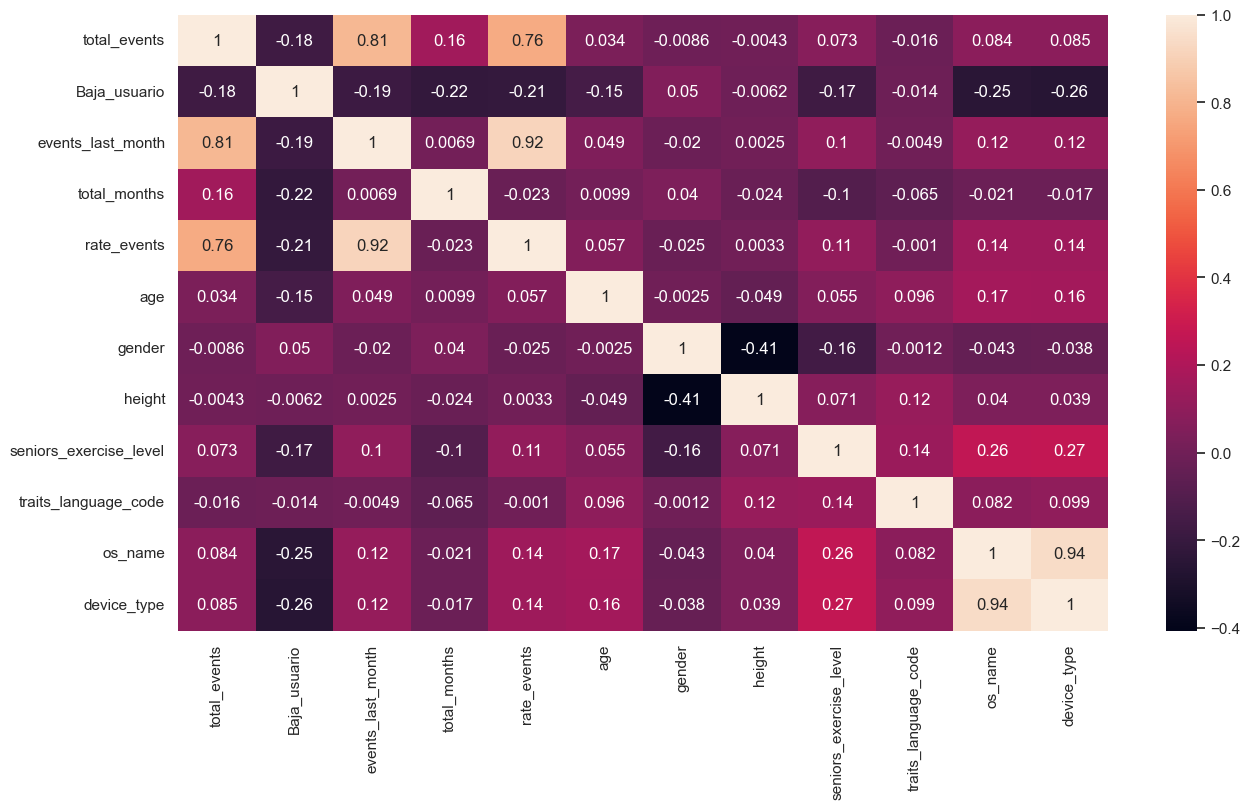

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(datos.corr(numeric_only=True),annot=True)

In [51]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
total_events,20023.0,138.562054,497.973648,1.0,40.0,93.0,136.0,28461.0
Baja_usuario,20023.0,0.788443,0.408422,0.0,1.0,1.0,1.0,1.0
events_last_month,20023.0,110.206662,297.382041,0.0,31.0,76.0,125.0,14254.0
total_months,20023.0,1.302752,0.931226,1.0,1.0,1.0,1.0,7.0
rate_events,20023.0,110.364240,246.640336,0.8,34.0,79.0,126.0,14255.0
age,20023.0,62.494931,6.283330,0.0,60.0,62.0,66.0,106.0
gender,20023.0,0.867952,0.338552,0.0,1.0,1.0,1.0,1.0
height,20023.0,163.647599,8.109322,0.0,159.0,164.0,169.0,300.0
seniors_exercise_level,20023.0,1.637717,0.649489,1.0,1.0,2.0,2.0,3.0
traits_language_code,20023.0,1.138890,0.345841,1.0,1.0,1.0,1.0,2.0


In [52]:
datos_goals.describe().T

,count,mean,std,min,25%,50%,75%,max
total_events,20023.0,138.562054,497.973648,1.0,40.0,93.0,136.0,28461.0
Baja_usuario,20023.0,0.788443,0.408422,0.0,1.0,1.0,1.0,1.0
events_last_month,20023.0,110.206662,297.382041,0.0,31.0,76.0,125.0,14254.0
total_months,20023.0,1.302752,0.931226,1.0,1.0,1.0,1.0,7.0
rate_events,20023.0,110.364240,246.640336,0.8,34.0,79.0,126.0,14255.0
age,20023.0,62.494931,6.283330,0.0,60.0,62.0,66.0,106.0
gender,20023.0,0.867952,0.338552,0.0,1.0,1.0,1.0,1.0
height,20023.0,163.647599,8.109322,0.0,159.0,164.0,169.0,300.0
seniors_exercise_level,20023.0,1.637717,0.649489,1.0,1.0,2.0,2.0,3.0
traits_language_code,20023.0,1.138890,0.345841,1.0,1.0,1.0,1.0,2.0


### Modelo de prediccion

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [54]:
datos.head()

,user_id,total_events,Baja_usuario,events_last_month,total_months,rate_events,age,gender,height,seniors_exercise_level,traits_language_code,os_name,device_type
0,00VjxBSh5SWZtvDuQObqKhuhymH3,63,1,62.0,1,63.00,51.0,1,162.0,1.0,1,1,1
63,00fiXwcWv6WH27m5CzlZhMmJj4r1,90,0,89.0,1,90.00,61.0,1,167.0,2.0,1,3,2
153,01HG47fhPxXGB1IH9TwqCcbuAGv1,25,1,24.0,1,25.00,66.0,1,164.0,1.0,1,1,1
178,01IkDUDtagPFULtB05C9q4TLeAh2,216,0,215.0,1,216.00,69.0,1,159.0,1.0,1,2,2
394,01PH4mMfTReLSovBbVPClTbKQZE3,99,1,7.0,4,24.75,57.0,1,159.0,1.0,1,1,1


In [55]:
datos_goals.head()

,user_id,total_events,Baja_usuario,events_last_month,total_months,rate_events,age,gender,height,seniors_exercise_level,...,os_name,device_type,main_goal_feelBetter,main_goal_loseWeight,main_goal_reducePain,main_goal_stayActive,nutritional_goal_improveNutrition,nutritional_goal_increaseMuscle,nutritional_goal_loseWeight,nutritional_goal_none
0,00VjxBSh5SWZtvDuQObqKhuhymH3,63,1,62.0,1,63.00,51.0,1,162.0,1.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00fiXwcWv6WH27m5CzlZhMmJj4r1,90,0,89.0,1,90.00,61.0,1,167.0,2.0,...,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01HG47fhPxXGB1IH9TwqCcbuAGv1,25,1,24.0,1,25.00,66.0,1,164.0,1.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01IkDUDtagPFULtB05C9q4TLeAh2,216,0,215.0,1,216.00,69.0,1,159.0,1.0,...,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01PH4mMfTReLSovBbVPClTbKQZE3,99,1,7.0,4,24.75,57.0,1,159.0,1.0,...,1,1,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0


### Busco modelo con los datos_goals que es donde mas información tengo

In [56]:
X = datos_goals.drop(['Baja_usuario','user_id'], axis=1)
y = datos_goals['Baja_usuario']

In [57]:
seed=42

### Partir los datos en Train y Test

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = seed)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(16018, 19)
(4005, 19)
(16018,)
(16018,)


### Normalizo los datos con Standardscaler

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [61]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Model LogisticRegression

In [62]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [63]:
predictions1 = model_lr.predict(X_test)
print(predictions1)

[1 1 1 ... 0 1 1]


In [64]:
model_lr.coef_

array([[ 0.44003964,  0.15408882, -0.61400092, -1.71607281, -0.33108558,
         0.07926413,  0.00880434, -0.37644664,  0.029411  ,  0.00569406,
        -0.46392885, -0.06997256, -0.06818732, -0.05810292,  0.0206795 ,
        -0.04883936, -0.08215262, -0.05100289,  0.04486737]])

In [65]:
lr_score = model_lr.score(X_test,y_test)
print(lr_score)

0.8149812734082397


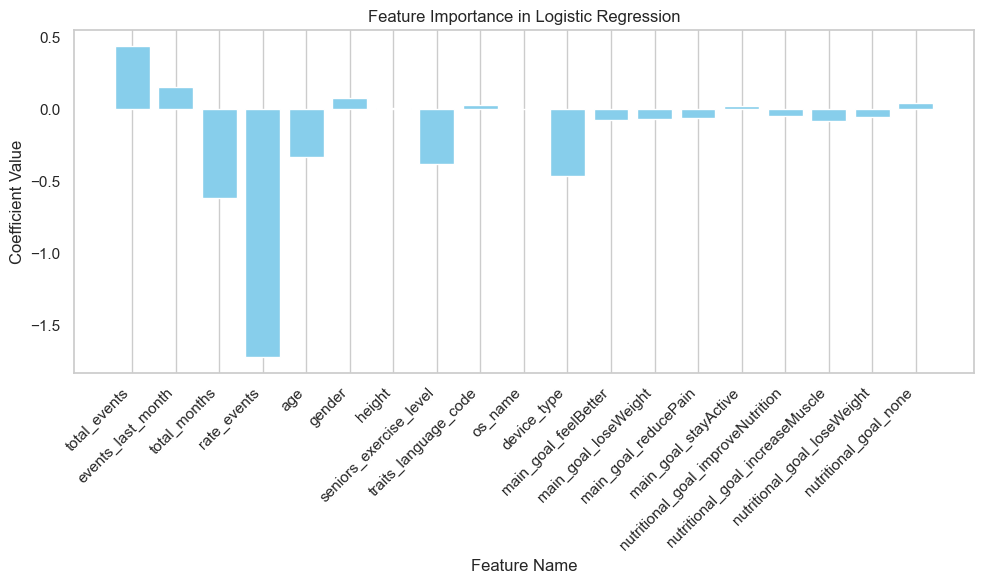

In [66]:
coefficients = model_lr.coef_[0]

# Get the names of the features
feature_names = ["total_events", "events_last_month", "total_months", "rate_events", "age", "gender",
                 "height", "seniors_exercise_level", 'traits_language_code', 'os_name', 'device_type',
                 'main_goal_feelBetter', 'main_goal_loseWeight', 'main_goal_reducePain',
                 'main_goal_stayActive', 'nutritional_goal_improveNutrition', 'nutritional_goal_increaseMuscle',
                 'nutritional_goal_loseWeight', 'nutritional_goal_none'] 

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color='skyblue')
plt.xlabel('Feature Name')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
plt.show()

In [67]:
predicions_proba = model_lr.predict_proba(X_test)
print(np.round(np.array(predicions_proba), 2))

[[0.19 0.81]
 [0.24 0.76]
 [0.36 0.64]
 ...
 [0.78 0.22]
 [0.44 0.56]
 [0.21 0.79]]


In [68]:
acc_lr = accuracy_score(y_test, predictions1)

error = 1 - acc_lr
print("Acierto:", round(acc_lr*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 81.5 %
Error: 18.5 %


In [69]:
c_matrix = confusion_matrix(y_test, predictions1)
print(c_matrix)

[[ 216  636]
 [ 105 3048]]


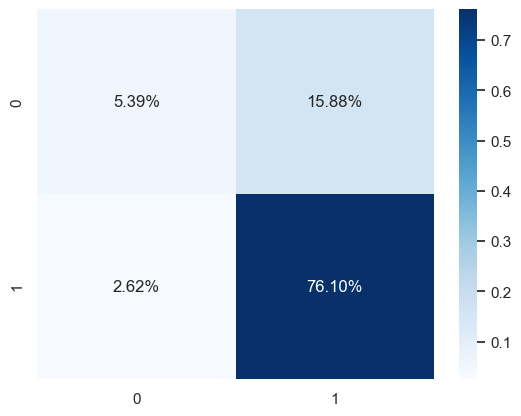

In [70]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

### Bagging con DecisionTreeClassifier

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [72]:
estimator = DecisionTreeClassifier(max_depth=3,random_state=42)
#estimator = LogisticRegression()

model_bag_clf = BaggingClassifier(
    base_estimator = estimator,
    n_estimators=1000, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)


model_bag_clf.fit(X_train, y_train)
y_pred = model_bag_clf.predict(X_test)
acc_bagg = accuracy_score(y_test, y_pred)
print(acc_bagg)

0.8434456928838951


### Decision Trees Clasifier

In [73]:
import sklearn

In [74]:
model_dtc = DecisionTreeClassifier(max_depth=7, random_state=42)
model_dtc.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=7, random_state=42)

In [75]:
predictions2 = model_dtc.predict(X_test)

In [76]:
acc_dtc = accuracy_score(y_test,predictions2)
print(acc_dtc)

0.8621722846441947


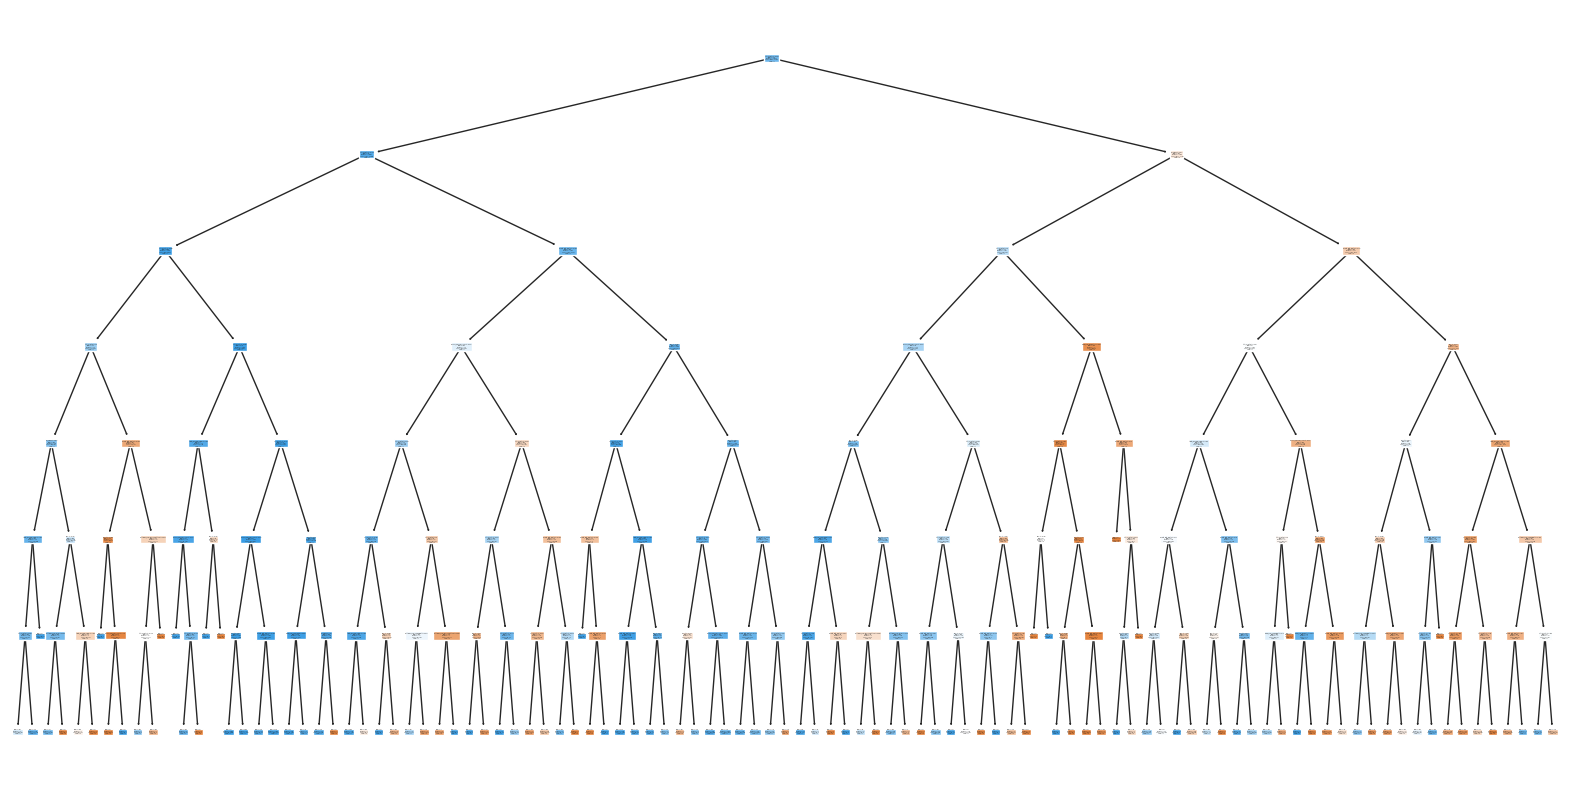

In [77]:
### Este es el arbol con max_depth = 3

plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(model_dtc, feature_names=list(X.columns), class_names=list(map(str, model_dtc.classes_)), filled=True)
plt.show()

### Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_rnd_clf = RandomForestClassifier(n_estimators=100,
                                        max_features=3,
                                        random_state=seed)
model_rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [80]:
predictions3 = model_rnd_clf.predict(X_test)
acc_rfc = accuracy_score(y_test,predictions3)
print(acc_rfc)

0.8699126092384519


### Ada Boost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
model_ab_cls=AdaBoostClassifier(n_estimators=30,random_state=seed)

In [83]:
model_cvs_ab=cross_val_score(estimator=model_ab_cls, X=X_train,y=y_train,cv=10,scoring='accuracy')

In [84]:
model_cvs_ab

array([0.83458177, 0.85143571, 0.85143571, 0.85330836, 0.84394507,
       0.85580524, 0.85205993, 0.84332085, 0.83198001, 0.83947533])

In [85]:
model_cvs_ab.mean()

0.8457347974619485

In [86]:
model_ab_cls.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30, random_state=42)

In [87]:
predictions5 = model_ab_cls.predict(X_test)
acc_ab_cls = accuracy_score(y_test,predictions5)
print(acc_ab_cls)

0.8434456928838951


### Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
model_gb_cl=GradientBoostingClassifier(n_estimators=100,random_state=seed)

In [90]:
model_cvs_gb_cl=cross_val_score(estimator=model_gb_cl, X=X_train,y=y_train,cv=10,scoring='accuracy')
model_cvs_gb_cl

array([0.8545568 , 0.86641698, 0.86766542, 0.86953808, 0.86267166,
       0.8732834 , 0.86454432, 0.86454432, 0.85259213, 0.8569644 ])

In [91]:

model_cvs_gb_cl.mean()

0.863277750095329

In [92]:
model_gb_cl.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [93]:
predictions6 = model_gb_cl.predict(X_test)
acc_gb_cl = accuracy_score(y_test, predictions6)
print(acc_gb_cl)

0.866167290886392


### XGBoost

In [94]:
#!pip install xgboost

In [95]:
from xgboost import XGBClassifier

In [96]:
model_xgb_clas=XGBClassifier(n_estimators=100,random_state=seed)

In [97]:
cvs_xgb=cross_val_score(estimator=model_xgb_clas, X=X_train,y=y_train,cv=10,scoring='accuracy')
cvs_xgb

array([0.86953808, 0.86766542, 0.86766542, 0.87515605, 0.86891386,
       0.88389513, 0.8732834 , 0.8576779 , 0.85758901, 0.8700812 ])

In [98]:
cvs_xgb.mean()

0.8691465462051262

In [99]:
model_xgb_clas.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [100]:
predictions4 = model_xgb_clas.predict(X_test)

In [101]:
acc_xgb = accuracy_score(y_test,predictions4)
print(acc_xgb)

0.8736579275905119


In [102]:
result = [lr_score, acc_bagg, acc_dtc, acc_rfc, acc_ab_cls,acc_gb_cl,acc_xgb]
models = ['LogisticReg','Bagging DT', "DecisionTree","RandomForest", "Ada Boost", "GradientBoosting", "XGBoost"]
resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

XGBoost             0.873658
RandomForest        0.869913
GradientBoosting    0.866167
DecisionTree        0.862172
Bagging DT          0.843446
Ada Boost           0.843446
LogisticReg         0.814981
dtype: float64

In [103]:
feature_importances = model_xgb_clas.feature_importances_

In [104]:
feature_importance_df = pd.DataFrame({'Columna': X.columns, 'Importancia': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False).reset_index()
feature_importance_df = feature_importance_df.drop('index',axis=1)
feature_importance_df

,Columna,Importancia
0,total_events,0.244900
1,total_months,0.083878
2,rate_events,0.069963
3,os_name,0.065885
4,traits_language_code,0.056373
5,seniors_exercise_level,0.055478
6,nutritional_goal_none,0.045119
7,events_last_month,0.039560
8,main_goal_reducePain,0.038894
9,nutritional_goal_loseWeight,0.037922


### XGBoost Classifier nos ha dado el mejor accuracy, hago un GridSearchCV para buscar los mejores parametros

In [105]:
xgb = XGBClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [3,5,7,9],
          "random_state": [42]}

gbc_et = GridSearchCV(estimator=xgb,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

gbc_et.fit(X_train, y_train)
gbc_et.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Los mejores parametros para el GradientBoostingClassifier son max_depth=7 y estimators=50

In [106]:
xgb_fin=XGBClassifier(max_depth=7,n_estimators=50,random_state=42)
xgb_fin.fit(X_train,y_train)
predictions = xgb_fin.predict(X_test)
xgb_score= f1_score(y_test,predictions)
xgb_acc=accuracy_score(y_test,predictions)

In [107]:
print(xgb_score)
print(xgb_acc)

0.9233379608206078
0.8759051186017478


In [108]:
recall_score(y_test,predictions)

0.9492546780843641

In [109]:
feature_importances = xgb_fin.feature_importances_

In [110]:
feature_importance_df = pd.DataFrame({'Columna': X.columns, 'Importancia': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False).reset_index()
feature_importance_df = feature_importance_df.drop('index',axis=1)
feature_importance_df

,Columna,Importancia
0,total_events,0.257019
1,total_months,0.075643
2,os_name,0.071338
3,rate_events,0.069376
4,seniors_exercise_level,0.065512
5,traits_language_code,0.053461
6,nutritional_goal_none,0.047802
7,events_last_month,0.042529
8,nutritional_goal_loseWeight,0.038772
9,age,0.036254


In [111]:
print("Score del modelo (accuracy):", round(xgb_fin.score(X_test, y_test), 3))
print("Accuracy score:", round(accuracy_score(y_test, predictions), 3))
print("Recall score:", round(recall_score(y_test, predictions), 3))
print("Precision score:", round(precision_score(y_test, predictions), 3))
print("F1 score:", round(f1_score(y_test, predictions), 3))


Score del modelo (accuracy): 0.876
Accuracy score: 0.876
Recall score: 0.949
Precision score: 0.899
F1 score: 0.923


In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

[[ 515  337]
 [ 160 2993]]


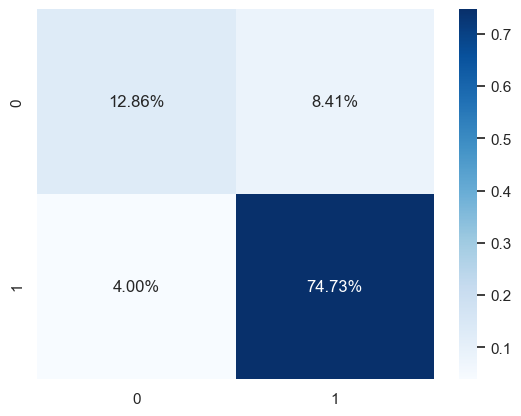

In [113]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

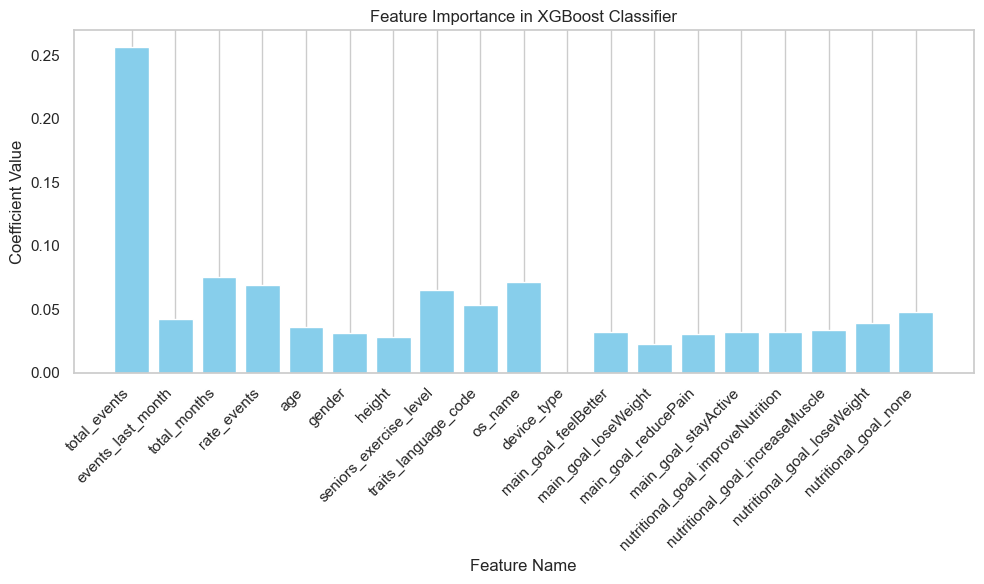

In [114]:

coefficients = feature_importances

# Get the names of the features
feature_names = ["total_events", "events_last_month", "total_months", "rate_events", "age", "gender",
                 "height", "seniors_exercise_level", 'traits_language_code', 'os_name', 'device_type',
                 'main_goal_feelBetter', 'main_goal_loseWeight', 'main_goal_reducePain',
                 'main_goal_stayActive', 'nutritional_goal_improveNutrition', 'nutritional_goal_increaseMuscle',
                 'nutritional_goal_loseWeight', 'nutritional_goal_none'] 

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color='skyblue')
plt.xlabel('Feature Name')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in XGBoost Classifier')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
plt.show()

In [115]:
feature_importances = xgb_fin.feature_importances_

In [116]:
feature_importances

array([0.25701892, 0.04252932, 0.07564322, 0.0693763 , 0.03625403,
       0.03115027, 0.0284069 , 0.06551218, 0.05346113, 0.07133795,
       0.        , 0.03214996, 0.02239422, 0.03025294, 0.03207336,
       0.03234175, 0.03352355, 0.03877241, 0.04780157], dtype=float32)

In [117]:
datos = datos_goals.drop(['Baja_usuario','user_id'],axis=1)

In [118]:
temporal = datos.drop(['total_events'],axis=1)

In [119]:
feature_importance_df = pd.DataFrame({'Feature': temporal.columns, 'Importance': feature_importances[1:]})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

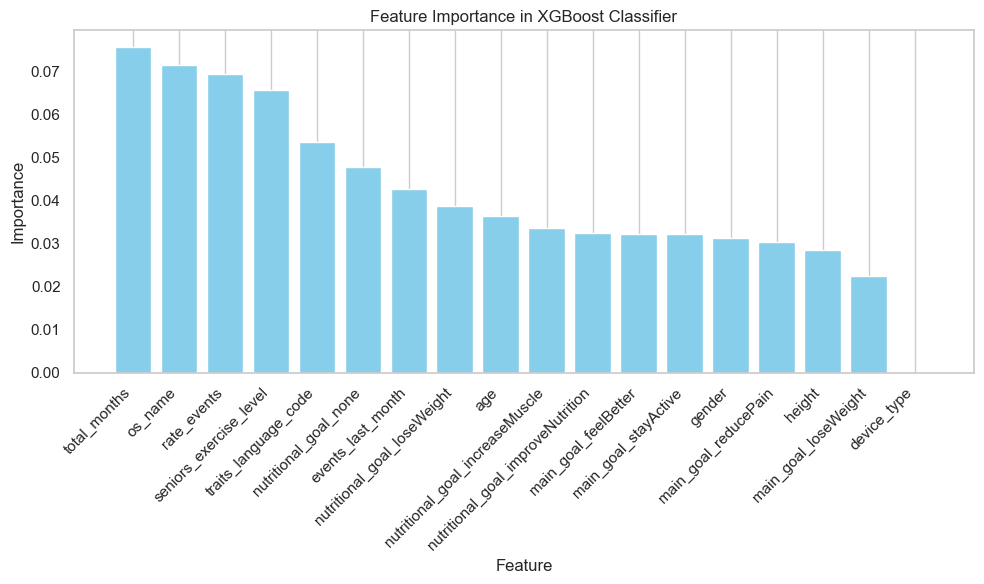

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in XGBoost Classifier')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
plt.show()

In [121]:
datos.os_name.value_counts()

os_name
1    11718
2     7518
3      787
Name: count, dtype: int64

In [122]:
datos.seniors_exercise_level.value_counts()

seniors_exercise_level
1.0    9164
2.0    8949
3.0    1910
Name: count, dtype: int64

In [123]:
datos_goals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20023 entries, 0 to 20022
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            20023 non-null  object 
 1   total_events                       20023 non-null  int64  
 2   Baja_usuario                       20023 non-null  int64  
 3   events_last_month                  20023 non-null  float64
 4   total_months                       20023 non-null  int64  
 5   rate_events                        20023 non-null  float64
 6   age                                20023 non-null  float64
 7   gender                             20023 non-null  int64  
 8   height                             20023 non-null  float64
 9   seniors_exercise_level             20023 non-null  float64
 10  traits_language_code               20023 non-null  int64  
 11  os_name                            20023 non-null  int64  


In [6]:
df_grouped2 = datos_goals.groupby(['Baja_usuario', 'gender']).size().unstack()

In [8]:
df_grouped2

gender,0,1
Baja_usuario,,
0,698,3538
1,1946,13841


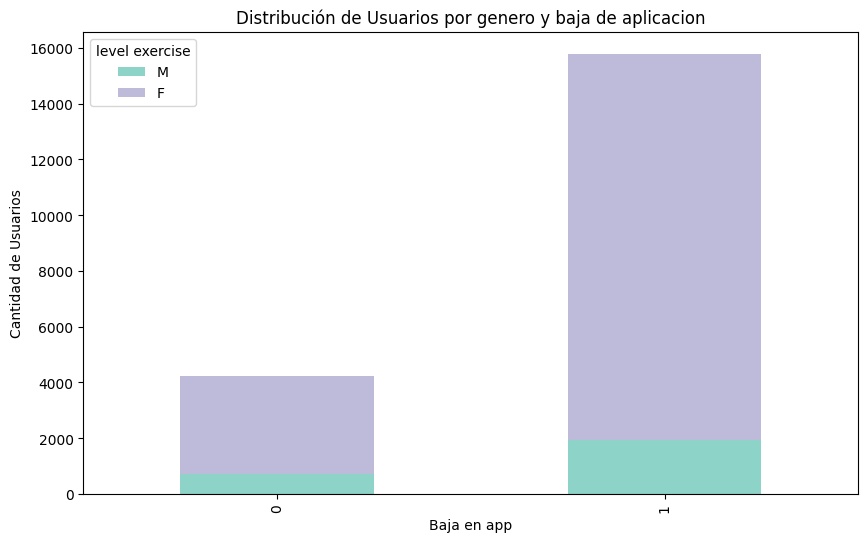

In [10]:


colors = ['#8dd3c7', '#bebada']

df_grouped2.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
#df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Usuarios por genero y baja de aplicacion')
plt.xlabel('Baja en app')
plt.ylabel('Cantidad de Usuarios')
plt.legend(title='level exercise', labels=['M','F'], loc='upper left')
plt.show()

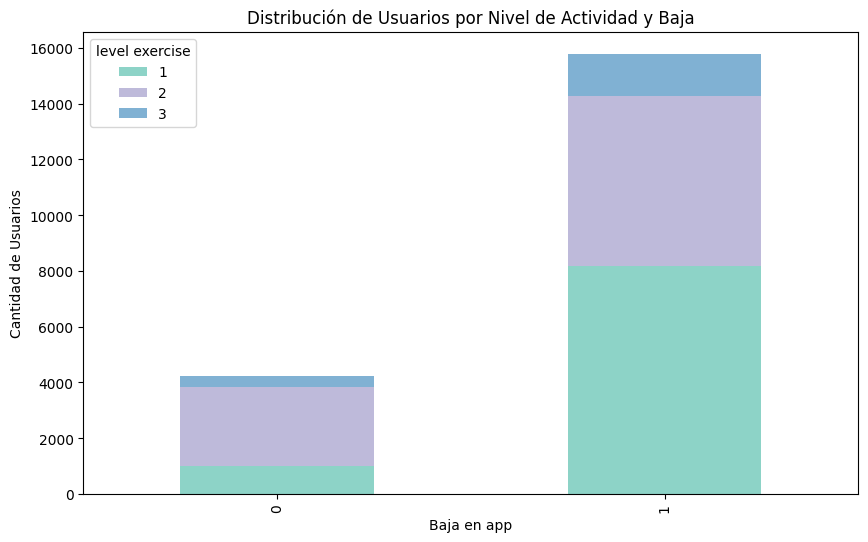

In [11]:

df_grouped = datos_goals.groupby(['Baja_usuario', 'seniors_exercise_level']).size().unstack()

colors = ['#8dd3c7', '#bebada', '#80b1d3']

df_grouped.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
#df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Usuarios por Nivel de Actividad y Baja')
plt.xlabel('Baja en app')
plt.ylabel('Cantidad de Usuarios')
plt.legend(title='level exercise', labels=['1', '2','3'], loc='upper left')
plt.show()